In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

In [2]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [3]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"
processed_file = Path(data_root, 'data/processed/facial-1001.pkl')

In [4]:
data = load_data(processed_file)

In [5]:
len(data)

300

In [6]:
data[0]['features'].shape

(3676, 323)

In [9]:
data[0]


{'user_id': 1,
 'test_condition': 10,
 'delay': 1000,
 'jitter': 500,
 'packet_loss_rate': 15,
 'features': array([[ 0.200067, -0.033075, -0.979224, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203814, -0.040347, -0.978178, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203665, -0.042064, -0.978137, ...,  0.      ,  0.      ,
          0.      ],
        ...,
        [-0.020206,  0.302458, -0.952948, ...,  0.      ,  0.      ,
          0.      ],
        [-0.015582,  0.300056, -0.953794, ...,  0.      ,  0.      ,
          0.      ],
        [-0.021239,  0.304443, -0.952294, ...,  1.      ,  0.      ,
          0.      ]])}

In [10]:
from sklearn.preprocessing import StandardScaler

In [24]:
def normalize_data(data):
    # Extract numerical data into a DataFrame
    df = pd.DataFrame({
        'user_id': [d['user_id'] for d in data],
        'test_condition': [d['test_condition'] for d in data],
        'delay': [d['delay'] for d in data],
        'jitter': [d['jitter'] for d in data],
        'packet_loss_rate': [d['packet_loss_rate'] for d in data]
    })
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Fit and transform the data
    scaled_data = scaler.fit_transform(df)
    
    # Convert scaled data back to DataFrame for easier handling
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

    # Normalize the features field
    # First, stack all features arrays vertically to create a single large 2D array
    all_features = np.vstack([d['features'] for d in data])
    
    # Scale the features
    feature_scaler = StandardScaler()
    scaled_features = feature_scaler.fit_transform(all_features)

    # Split the scaled features back into the original grouping
    feature_splits = np.split(scaled_features, np.cumsum([d['features'].shape[0] for d in data])[:-1])
    
    # Create a new list of dictionaries with normalized data
    normalized_data = []
    for i, original_dict in enumerate(data):
        # Create a new dictionary with the same structure
        new_dict = {
            'user_id': scaled_df.loc[i, 'user_id'],
            'test_condition': scaled_df.loc[i, 'test_condition'],
            'delay': scaled_df.loc[i, 'delay'],
            'jitter': scaled_df.loc[i, 'jitter'],
            'packet_loss_rate': scaled_df.loc[i, 'packet_loss_rate'],
            'features': original_dict['features']  # keep original features
            # 'features': feature_splits[i]  # normalized features
        }
        normalized_data.append(new_dict)
    
    return normalized_data

In [25]:
normalized_data = normalize_data(data)

In [26]:
normalized_data[0]

{'user_id': -1.647508942095828,
 'test_condition': 0.4629100498862757,
 'delay': 1.0690449676496976,
 'jitter': 1.224744871391589,
 'packet_loss_rate': 0.0,
 'features': array([[ 0.200067, -0.033075, -0.979224, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203814, -0.040347, -0.978178, ...,  1.      ,  0.      ,
          0.      ],
        [ 0.203665, -0.042064, -0.978137, ...,  0.      ,  0.      ,
          0.      ],
        ...,
        [-0.020206,  0.302458, -0.952948, ...,  0.      ,  0.      ,
          0.      ],
        [-0.015582,  0.300056, -0.953794, ...,  0.      ,  0.      ,
          0.      ],
        [-0.021239,  0.304443, -0.952294, ...,  1.      ,  0.      ,
          0.      ]])}

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

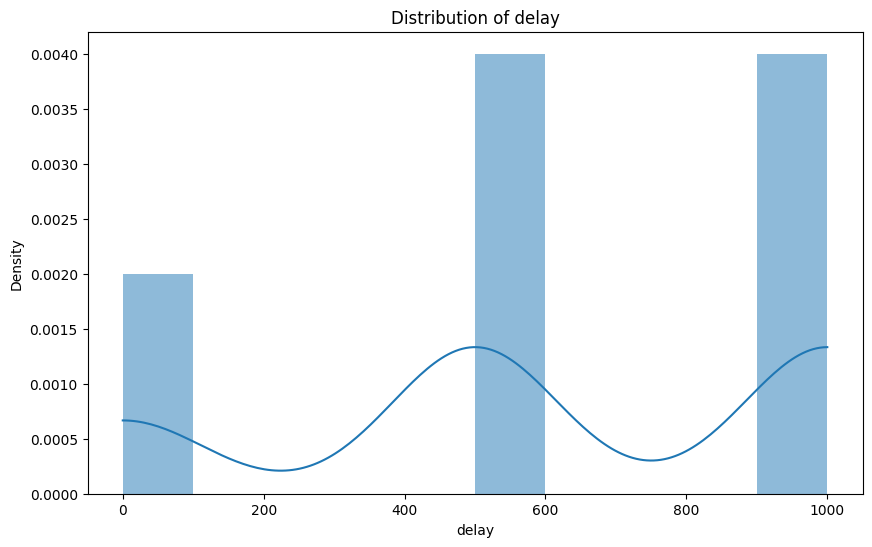

In [16]:
def plot_distribution(data, field):
    # Extract the field values from the data
    values = [d[field] for d in data if field in d]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.histplot(values, kde=True, stat="density", linewidth=0)
    
    # Adding labels and title
    plt.title(f'Distribution of {field}')
    plt.xlabel(field)
    plt.ylabel('Density')
    
    # Show the plot
    plt.show()

# Example usage:
plot_distribution(data, 'delay')

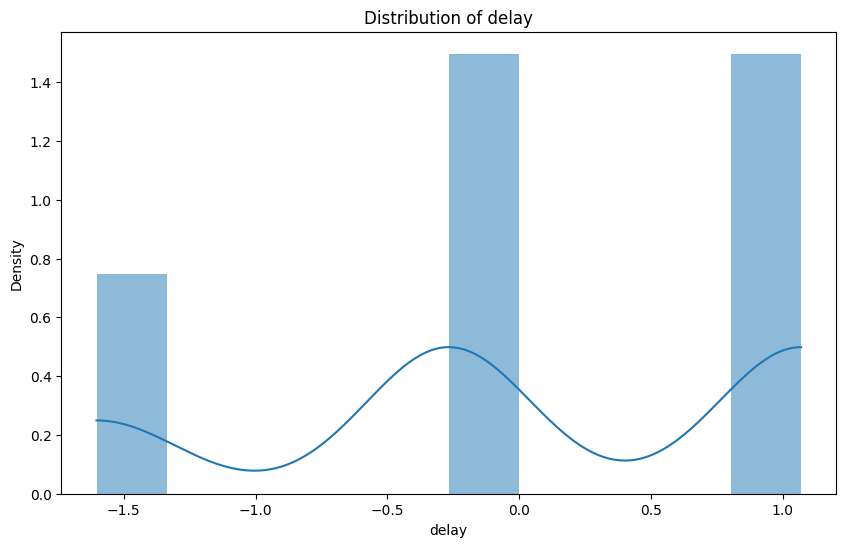

In [20]:
plot_distribution(normalized_data, 'delay')

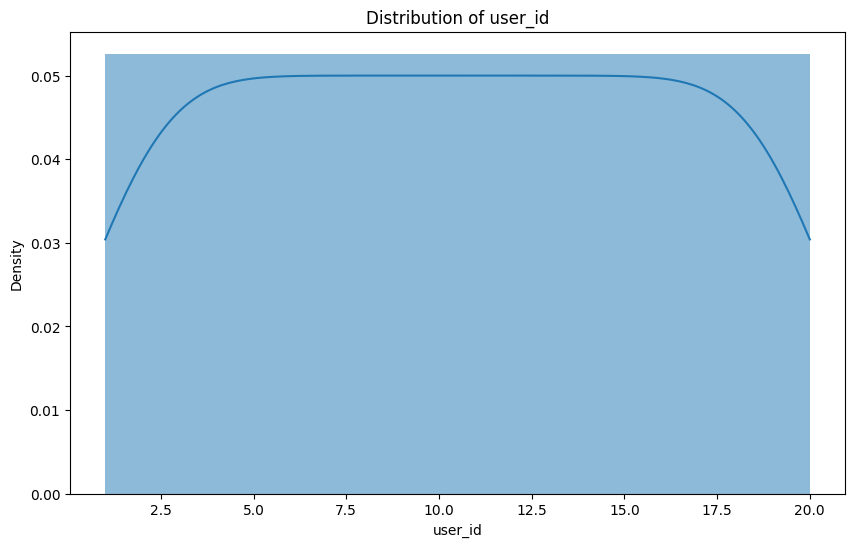

In [18]:
plot_distribution(data, 'user_id')

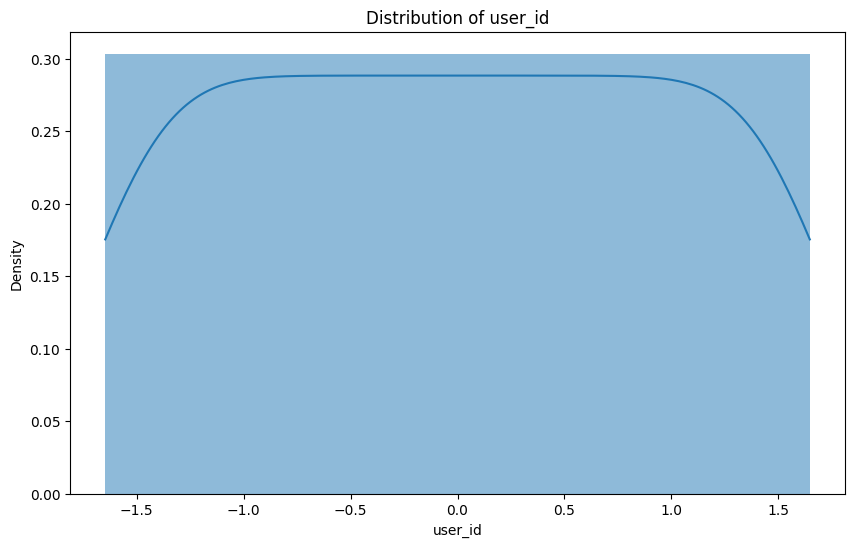

In [19]:
plot_distribution(normalized_data, 'user_id')

In [27]:
def save_data(data, filename):
    with open(filename, 'wb') as file:
        pickle.dump(data, file)

In [28]:
normalized_file = Path(data_root, 'data/processed/facial-1001-normalized.pkl')
save_data(normalized_data, normalized_file)